In [1]:
# Required libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data augmentation functions

def rotation(img, angle):
    image_center = tuple(np.array(img.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    return rotated_img

def gaussianNoise(img):
    row,col,ch= img.shape
    mean = 0
    var = 0.0001
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = img + gauss
    
    return noisy

def pepperSaltNoise(img):
    s_vs_p = 0.5
    amount = 0.01
    out = np.copy(img)
    
    # Salt mode
    num_salt = np.ceil(amount * img.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    out[coords] = 0
    
    return out

def poissonNoise(img):
    vals = len(np.unique(img))
    vals = 2.5 ** np.ceil(np.log2(vals))
    noisy = np.random.poisson(img * vals) / float(vals)
    
    return noisy

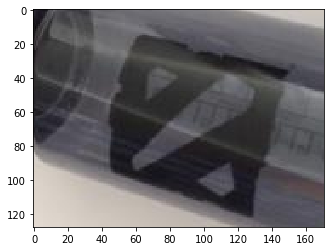

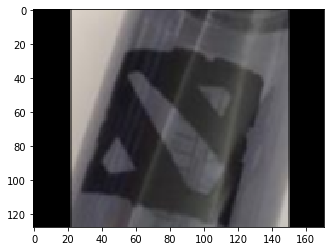

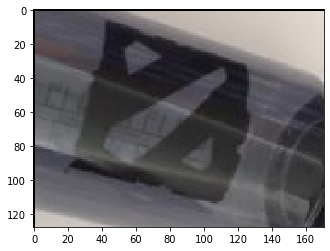

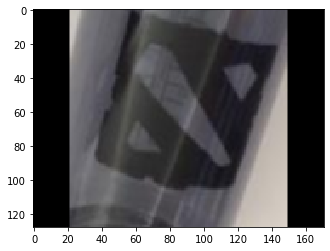

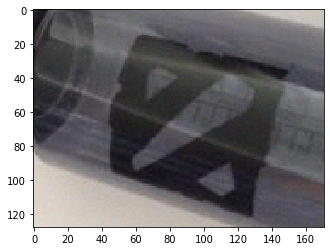

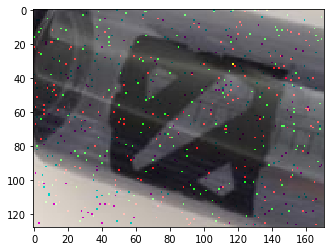

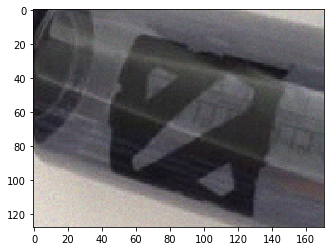

In [3]:
# Applying augmentation on a sample image

img = cv2.imread('dataset/plastic/plastic1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Cropping image from center
y1 = int(img.shape[0]/2 - img.shape[0]/6)
y2 = int(img.shape[0]/2 + img.shape[0]/6)
x1 = int(img.shape[1]/2 - img.shape[1]/6)
x2 = int(img.shape[1]/2 + img.shape[1]/6)
img = img[y1:y2, x1:x2]
img = img/255

plt.imshow(img)
plt.show()

rot270_img = rotation(img, 270) # clockwise rotation on image by 270 degrees
plt.imshow(rot270_img)
plt.show()
rot180_img = rotation(img, 180) # clockwise rotation on image by 180 degrees
plt.imshow(rot180_img)
plt.show()
rot90_img = rotation(img, 90) # clockwise rotation on image by 90 degrees
plt.imshow(rot90_img)
plt.show()

gaussian_img = gaussianNoise(img)  # Adds gaussian noise to image
plt.imshow(gaussian_img)
plt.show()
pepper_salt_img = pepperSaltNoise(img) # Adds pepper and salt noise noise to image
plt.imshow(pepper_salt_img)
plt.show()
poisson_img = poissonNoise(img) # Adds poisson noise noise to image
plt.imshow(poisson_img)
plt.show()

In [4]:
# Performs transformation on complete dataset and store augmented images

items = ['plastic', 'metal', 'glass', 'cardboard', 'paper']
for x in items:
    print(x, end = ', ')
    for i in range(1,401):
        # Reading image
        img = cv2.imread('dataset\\'+x+'\\'+x+str(i)+'.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255
        
        aug_img = rotation(img, 270)
        aug_img = aug_img * 255
        cv2.imwrite('dataset\\'+x+'\\'+x+str(400+i)+'.jpg',cv2.cvtColor(aug_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
        aug_img = rotation(img, 180)
        aug_img = aug_img * 255
        cv2.imwrite('dataset\\'+x+'\\'+x+str(800+i)+'.jpg',cv2.cvtColor(aug_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
        aug_img = rotation(img, 90)
        aug_img = aug_img * 255
        cv2.imwrite('dataset\\'+x+'\\'+x+str(1200+i)+'.jpg',cv2.cvtColor(aug_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
        aug_img = gaussianNoise(img)
        aug_img = aug_img * 255
        cv2.imwrite('dataset\\'+x+'\\'+x+str(1600+i)+'.jpg',cv2.cvtColor(aug_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
        aug_img = pepperSaltNoise(img)
        aug_img = aug_img * 255
        cv2.imwrite('dataset\\'+x+'\\'+x+str(2000+i)+'.jpg',cv2.cvtColor(aug_img.astype(np.uint8), cv2.COLOR_RGB2BGR))
        aug_img = poissonNoise(img)
        aug_img = aug_img * 255
        cv2.imwrite('dataset\\'+x+'\\'+x+str(2400+i)+'.jpg',cv2.cvtColor(aug_img.astype(np.uint8), cv2.COLOR_RGB2BGR))

plastic, metal, glass, cardboard, paper, 

In [5]:
# Reads final dataset to calculate histograms of each image

dataList = []
items = ['plastic','metal','glass', 'cardboard', 'paper']
for x in items:
    for i in range(1,2801):
        img = cv2.imread('dataset\\'+x+'\\'+x+str(i)+'.jpg', 0)
        # Calculating histograms
        hist = cv2.calcHist([img],[0],None,[256],[0,256])
        # Appending hist to dataList for classification
        dataList.append(hist)

# Converting dataList to a DataFrame
k = np.array(dataList)
k = k.reshape(14000,256)
df = pd.DataFrame(k)
print(df.shape)
df.head()

(14000, 256)


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.0,78.0,70.0,81.0,54.0,62.0,61.0,70.0,69.0,250.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,12.0,3.0,6.0,4.0,3.0,4.0,4.0,4.0,5.0


In [6]:
# Add labels to dataframe
df['labels'] = pd.Series(np.zeros(14000), index=df.index)
df.iloc[:2800, -1]='plastic'
df.iloc[2800:2800*2, -1]='metal'
df.iloc[2800*2:2800*3, -1]='glass'
df.iloc[2800*3:2800*4, -1]='cardboard'
df.iloc[2800*4:2800*5, -1]='paper'

# Shuffle rows of dataframe
df = df.sample(frac=1).reset_index(drop=True)
# Saving dataframe to disk
df.to_csv('dataset/hist.csv',index=None)